rho: 0.9999988306230774 [[ 0.00000000e+00  4.90111366e-02 -7.43384122e-03  4.05679796e-05
  -1.26921571e-07]] [999.88960954]
mu: 0.9998530678757274 [[ 0.00000000e+00 -5.40111024e-02  9.44706924e-04 -8.59405803e-06
   3.07083308e-08]] [1.76925871]


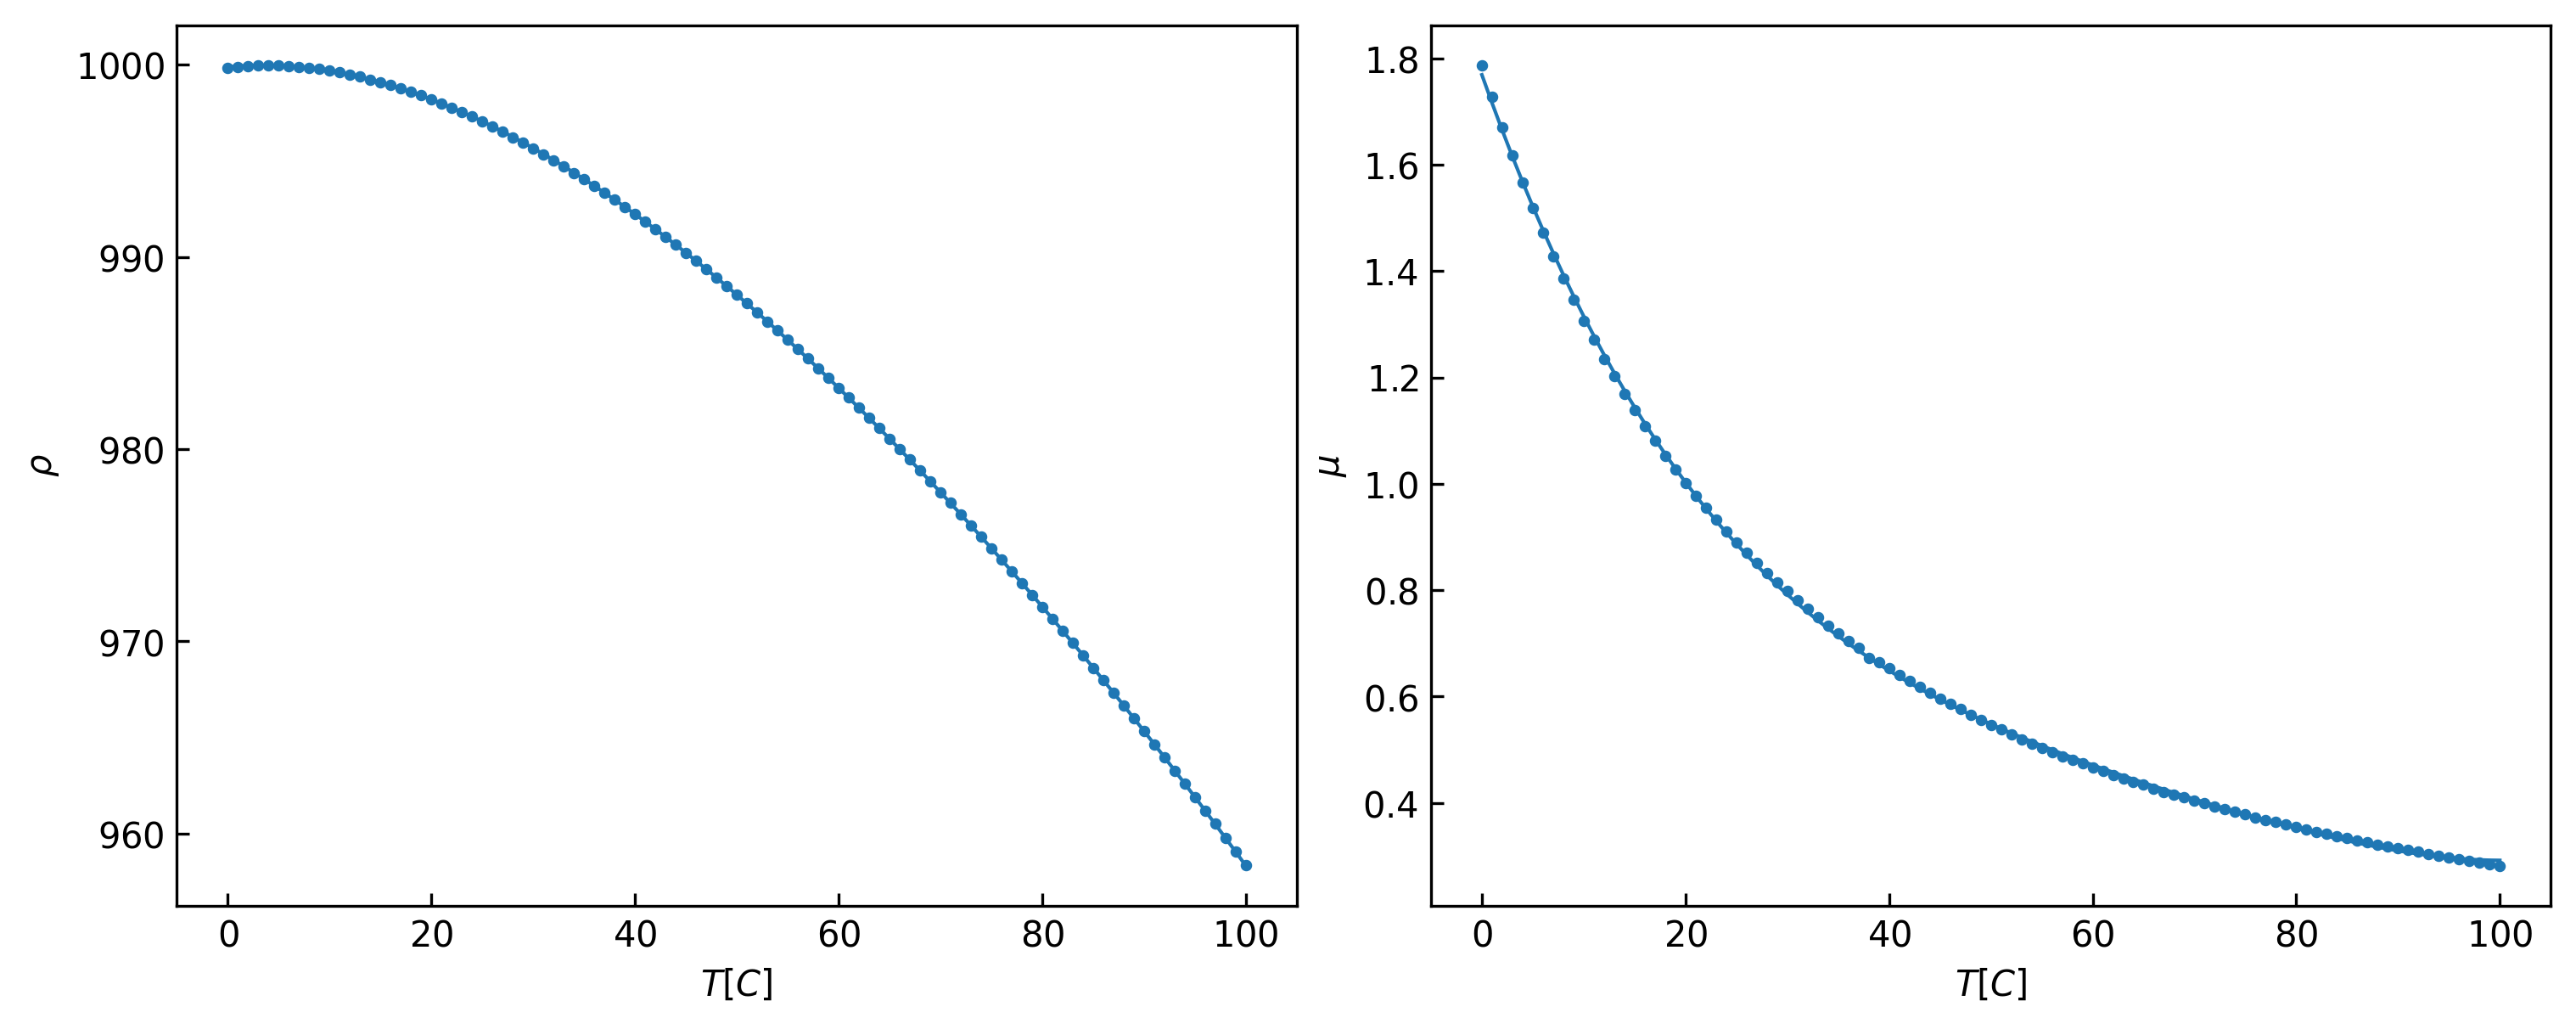

In [30]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


df_water = pd.read_csv('water.csv')
t = df_water['温度/℃'].values.reshape(-1,1)
rho = df_water['密度/(kg/m^2)'].values.reshape(-1,1)
mu = df_water['粘度/(mPa*s)'].values.reshape(-1,1)

model_rho = Pipeline([
            ('poly', PolynomialFeatures(degree=4)),
            ('linear', LinearRegression())
        ]).fit(t,rho)
rho_pred = model_rho.predict(t)

model_mu = Pipeline([
            ('poly', PolynomialFeatures(degree=4)),
            ('linear', LinearRegression())
        ]).fit(t,mu)
mu_pred = model_mu.predict(t)

fig, ax = plt.subplots(1,2,figsize=(10,4),dpi=300)
fig.tight_layout()
ax[0].set_xlabel(r'$T [C]$')
ax[0].set_ylabel(r'$\rho$')
ax[0].scatter(t,rho,s=5)
ax[0].plot(t,rho_pred,lw=1)
ax[1].set_xlabel(r'$T [C]$')
ax[1].set_ylabel(r'$\mu$')
ax[1].scatter(t,mu,s=5)
ax[1].plot(t,mu_pred,lw=1)
print("rho:",model_rho.score(t,rho), model_rho.named_steps['linear'].coef_, model_rho.named_steps['linear'].intercept_)
print("mu:",model_mu.score(t,mu), model_mu.named_steps['linear'].coef_, model_mu.named_steps['linear'].intercept_)
model_mu.predict(np.array([46]).reshape(-1,1))
plt.savefig('graph.jpg', bbox_inches='tight')

In [138]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

C_p_h = 4178
C_p_y = 4183
d_i = 17.0e-3
d_o = 19.0e-3
A_i = np.pi*d_i**2/4
A_o = np.pi*(d_o**2-d_i**2)/4


pd.options.display.float_format = '{:.4e}'.format

df_counter = pd.read_csv("counter.csv")
df_parallel = pd.read_csv("parallel.csv")
df_counter_result = pd.DataFrame()

df_counter_result["T_ave"] = (np.abs(df_counter['T_1 [℃]'].values+df_counter['T_2 [℃]'].values))/2
df_counter_result["Dt_lm"] = ((df_counter['T_1 [℃]']-df_counter['t_1 [℃]']) - (df_counter['T_2 [℃]']-df_counter['t_2 [℃]'])) / np.log((df_counter['T_1 [℃]']-df_counter['t_1 [℃]']) / (df_counter['T_2 [℃]']-df_counter['t_2 [℃]']))
df_counter_result["ρ"] = model_rho.predict(df_counter_result["T_ave"].values.reshape(-1,1))
df_counter_result["µ"] = model_mu.predict(df_counter_result["T_ave"].values.reshape(-1,1)) * 1e-3
df_counter_result["V_h' [L/h]"] = -1e-4 * df_counter['V_h [L/h]']**2 + 1.1383 * df_counter['V_h [L/h]'] - 1.1520
df_counter_result["V_c' [L/h]"] = -6e-4 * df_counter['V_c [L/h]']**2 + 1.0450 * df_counter['V_c [L/h]'] - 7.5058
df_counter_result["V_h'' [m3/s]"] = df_counter_result["V_h' [L/h]"] * 1e-3/3600
df_counter_result["V_c'' [m3/s]"] = df_counter_result["V_c' [L/h]"] * 1e-3/3600
df_counter_result["u_h [m/s]"] = df_counter_result["V_h'' [m3/s]"] / A_i
df_counter_result["u_c [m/s]"] = df_counter_result["V_c'' [m3/s]"] / A_o
df_counter_result["W_h [kg/s]"] = df_counter_result["V_h'' [m3/s]"] * df_counter_result['ρ']
df_counter_result["Q_w [W]]"] = df_counter_result['W_h [kg/s]'] * C_p_h * (df_counter['T_1 [℃]']-df_counter['T_2 [℃]'])


df_counter_result

,T_ave,Dt_lm,ρ,µ,V_h' [L/h],V_c' [L/h],V_h'' [m3/s],V_c'' [m3/s],u_h [m/s],u_c [m/s],W_h [kg/s],Q_w [W]]
0,4.6050e+01,2.4621e+01,9.8977e+02,5.8425e-04,3.2907e+01,9.0994e+01,9.1408e-06,2.5276e-05,4.0272e-02,4.4698e-01,9.0474e-03,8.2026e+02
1,4.3500e+01,2.6929e+01,9.9084e+02,6.0995e-04,3.2907e+01,1.7749e+02,9.1408e-06,4.9304e-05,4.0272e-02,8.7189e-01,9.0571e-03,1.0141e+03
2,4.7050e+01,2.9163e+01,9.8934e+02,5.7471e-04,4.4220e+01,9.0994e+01,1.2283e-05,2.5276e-05,5.4116e-02,4.4698e-01,1.2152e-02,1.0612e+03
3,4.5400e+01,3.0324e+01,9.9005e+02,5.9060e-04,4.4220e+01,1.7749e+02,1.2283e-05,4.9304e-05,5.4116e-02,8.7189e-01,1.2161e-02,1.2397e+03
4,4.8700e+01,3.1321e+01,9.8862e+02,5.5958e-04,5.5513e+01,9.0994e+01,1.5420e-05,2.5276e-05,6.7937e-02,4.4698e-01,1.5245e-02,1.1847e+03
5,4.7250e+01,3.2768e+01,9.8926e+02,5.7284e-04,5.5513e+01,1.7749e+02,1.5420e-05,4.9304e-05,6.7937e-02,8.7189e-01,1.5255e-02,1.3830e+03
6,5.0000e+01,3.6765e+01,9.8803e+02,5.4814e-04,1.5625e+02,3.4124e+02,4.3403e-05,9.4790e-05,1.9122e-01,1.6763e+00,4.2883e-02,3.2608e+03
7,4.9900e+01,3.6935e+01,9.8808e+02,5.4901e-04,1.5625e+02,3.6499e+02,4.3403e-05,1.0139e-04,1.9122e-01,1.7929e+00,4.2885e-02,3.3327e+03
8,5.0500e+01,3.6948e+01,9.8781e+02,5.4385e-04,1.7842e+02,3.4124e+02,4.9560e-05,9.4790e-05,2.1835e-01,1.6763e+00,4.8956e-02,3.6408e+03
9,5.0650e+01,3.7144e+01,9.8774e+02,5.4257e-04,1.7842e+02,3.6499e+02,4.9560e-05,1.0139e-04,2.1835e-01,1.7929e+00,4.8952e-02,3.5791e+03
